In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('/content/drive/MyDrive/DataAnalysis/competicion/competicion_feedback3/wanwan7123/Input/train.csv')

In [3]:
train.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5


In [4]:
# データ数確認
print(train.shape)

(3911, 8)


In [5]:
# 重複確認
train['text_id'].nunique()

3911

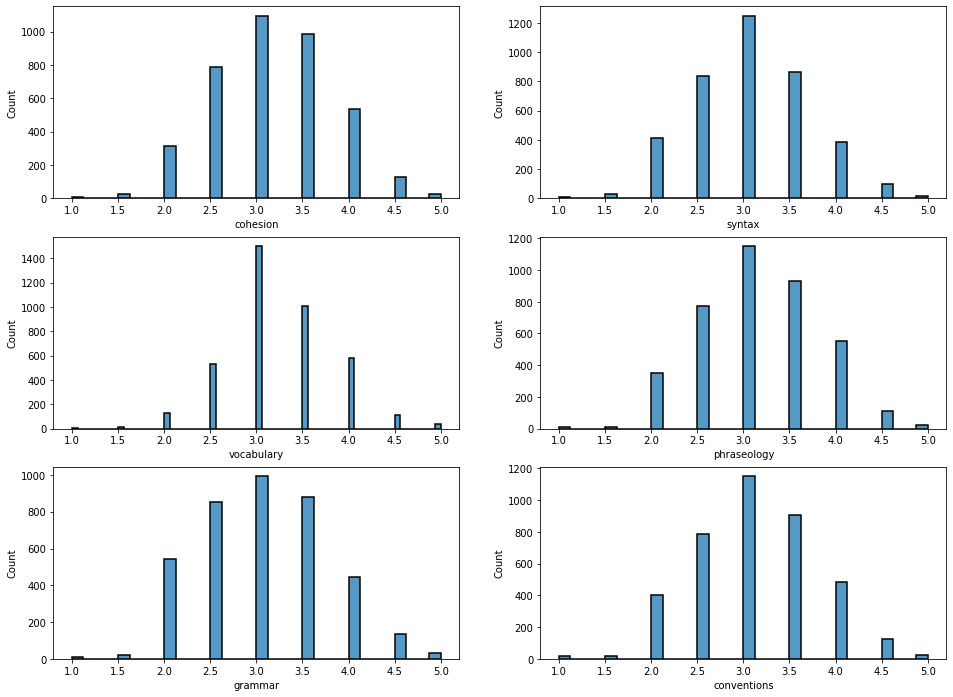

In [6]:
# target分布
fig, axs = plt.subplots(3, 2, figsize=(16, 12))

sns.histplot(train['cohesion'], linewidth=1.5, ax=axs[0][0])
sns.histplot(train['syntax'], linewidth=1.5, ax=axs[0][1])
sns.histplot(train['vocabulary'], linewidth=1.5, ax=axs[1][0])
sns.histplot(train['phraseology'], linewidth=1.5, ax=axs[1][1])
sns.histplot(train['grammar'], linewidth=1.5, ax=axs[2][0])
sns.histplot(train['conventions'], linewidth=1.5, ax=axs[2][1])

In [7]:
# テキストの長さとtarget確認
train['text_length'] = train['full_text'].apply(lambda x: len(x.split()))
train.describe()

,cohesion,syntax,vocabulary,phraseology,grammar,conventions,text_length
count,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000
mean,3.127077,3.028254,3.235745,3.116850,3.032856,3.081053,430.492969
std,0.662542,0.644399,0.583148,0.655997,0.699841,0.671450,191.868449
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000
25%,2.500000,2.500000,3.000000,2.500000,2.500000,2.500000,294.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,402.000000
75%,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000,526.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1260.000000


# readability

In [9]:
!pip install readability
import readability

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for readability: filename=readability-0.3.1-py3-none-any.whl size=35475 sha256=275798cf1b274f643cee1a6d775a9059eb60faf987f6cee38204976a841c31f3
  Stored in directory: /root/.cache/pip/wheels/b9/8b/5a/ba40b81d8e91c7bc1d4226fa51d7b5943d147be122df515c19
Successfully built readability


In [10]:
def make_ari_score(text):
    result = readability.getmeasures(text, lang='en')
    return result['readability grades']['ARI']

def make_flesch_score(text):
    result = readability.getmeasures(text, lang='en')
    return result['readability grades']['FleschReadingEase']

def make_dale_score(text):
    result = readability.getmeasures(text, lang='en')
    return result['readability grades']['DaleChallIndex']

In [11]:
train['ari_score'] = train['full_text'].apply(make_ari_score)
train['flesch_score'] = train['full_text'].apply(make_flesch_score)
train['dale_score'] = train['full_text'].apply(make_dale_score)

In [12]:
train.corr()

,cohesion,syntax,vocabulary,phraseology,grammar,conventions,text_length,ari_score,flesch_score,dale_score
cohesion,1.000000,0.695459,0.666151,0.690058,0.638689,0.666151,0.218739,-0.010691,-0.005449,0.012614
syntax,0.695459,1.000000,0.680562,0.725467,0.709525,0.700025,0.188038,0.031144,-0.045958,0.056440
vocabulary,0.666151,0.680562,1.000000,0.735261,0.654852,0.664292,0.271143,0.079247,-0.097557,0.108330
phraseology,0.690058,0.725467,0.735261,1.000000,0.719746,0.666842,0.214308,0.066137,-0.079697,0.084416
grammar,0.638689,0.709525,0.654852,0.719746,1.000000,0.673301,0.080283,0.029489,-0.040557,0.053079
conventions,0.666151,0.700025,0.664292,0.666842,0.673301,1.000000,0.143493,-0.007775,-0.005779,0.010170
text_length,0.218739,0.188038,0.271143,0.214308,0.080283,0.143493,1.000000,0.319353,-0.317441,0.299625
ari_score,-0.010691,0.031144,0.079247,0.066137,0.029489,-0.007775,0.319353,1.000000,-0.996140,0.976251
flesch_score,-0.005449,-0.045958,-0.097557,-0.079697,-0.040557,-0.005779,-0.317441,-0.996140,1.000000,-0.981634
dale_score,0.012614,0.056440,0.108330,0.084416,0.053079,0.010170,0.299625,0.976251,-0.981634,1.000000


In [13]:
train

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,text_length,ari_score,flesch_score,dale_score
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,261,30.998750,34.735909,9.481956
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,533,41.487917,14.199726,9.304709
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,320,79.724455,-60.621818,15.791924
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,728,45.320397,9.531786,11.122457
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,234,36.772308,23.180385,9.799574
...,...,...,...,...,...,...,...,...,...,...,...,...
3906,FFD29828A873,I believe using cellphones in class for educat...,2.5,3.0,3.0,3.5,2.5,2.5,179,17.020335,54.704704,9.646370
3907,FFD9A83B0849,"Working alone, students do not have to argue w...",4.0,4.0,4.0,4.0,3.5,3.0,465,33.040607,24.346974,10.801233
3908,FFDC4011AC9C,"""A problem is a chance for you to do your best...",2.5,3.0,3.0,3.0,3.5,3.0,257,126.619035,-156.002124,18.860545
3909,FFE16D704B16,Many people disagree with Albert Schweitzer's ...,4.0,4.5,4.5,4.0,4.5,4.5,510,51.061503,-8.224890,12.466271


In [15]:
text = "An implementation of traditional readability measures based on simple surface characteristics. These measures are basically linear regressions based on the number of words, syllables, and sentences."
results = readability.getmeasures(text, lang='en')
print(results['readability grades']['ARI'])

22.184999999999995
